In [1]:
file_path = '/nfs/data/COST_IBD/data/atopic_dermatitis/datasets/He/Run/output/alevin/mtx_conversions/combined_raw_matrix.h5ad'

adata = sc.read_h5ad(file_path)

In [1]:
import anndata as ad
import scanpy as sc
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
import toolbox as tb

In [2]:
adata = sc.read_h5ad('/nfs/data/COST_IBD/data/atopic_dermatitis/anndata/he.h5ad')

In [3]:
adata.obs.head()

,sample,tissue,condition,batch,patient,severity
GGTGTTAGTTGCGTTA_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804,unknown
TGAGCCGCATCCCACT_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804,unknown
TGTATTCTCAACGCTA_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804,unknown
ATGAGGGTCTGTCTCG_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804,unknown
GAATAAGTCGCAAGCC_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804,unknown


In [4]:
adata.obs = adata.obs.drop(columns=['fastq_1'])
adata.obs = adata.obs.drop(columns=['fastq_2'])


In [7]:
adata.obs

,sample,tissue,condition,batch,patient
GGTGTTAGTTGCGTTA_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
TGAGCCGCATCCCACT_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
TGTATTCTCAACGCTA_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
ATGAGGGTCTGTCTCG_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
GAATAAGTCGCAAGCC_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
...,...,...,...,...,...
ATCATCTCAGACGCTC_SAMN14430808_raw,SAMN14430808_raw,skin,Healthy_Healthy,GSE147424_Healthy_Healthy,SAMN14430808
CACACCTCATTTCACT_SAMN14430808_raw,SAMN14430808_raw,skin,Healthy_Healthy,GSE147424_Healthy_Healthy,SAMN14430808
CTAGTGAGTAAAGGAG_SAMN14430808_raw,SAMN14430808_raw,skin,Healthy_Healthy,GSE147424_Healthy_Healthy,SAMN14430808
CGGGTCACAGGCTCAC_SAMN14430808_raw,SAMN14430808_raw,skin,Healthy_Healthy,GSE147424_Healthy_Healthy,SAMN14430808


In [5]:
adata.obs['patient'] = adata.obs['sample'].str.replace('_raw', '')

In [6]:
adata.obs['tissue'] = 'skin'

In [10]:
condition_mapping = {
    'SAMN14430805': 'Atopic dermatitis_Lesional',
    'SAMN14430804': 'Atopic dermatitis_Lesional',
    'SAMN14430803': 'Atopic dermatitis_Non-lesional',
    'SAMN14430802': 'healthy',
    'SAMN14430801': 'Atopic dermatitis_Lesional',
    'SAMN14430800': 'healthy',
    'SAMN14430799': 'Atopic dermatitis_Lesional',
    'SAMN14430798': 'healthy',
    'SAMN14430797': 'healthy',
    'SAMN14430796': 'healthy',
    'SAMN14430795': 'Atopic dermatitis_Non-lesional',
    'SAMN14430794': 'healthy',
    'SAMN14430793': 'healthy',
    'SAMN14430792': 'Atopic dermatitis_Non-lesional',
    'SAMN14430807': 'Atopic dermatitis_Non-lesional',
    'SAMN14430809': 'Atopic dermatitis_Non-lesional',
    'SAMN14430808': 'healthy'
}
adata.obs['condition'] = adata.obs['patient'].map(condition_mapping)
adata.obs

,sample,tissue,condition,batch,patient
GGTGTTAGTTGCGTTA_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
TGAGCCGCATCCCACT_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
TGTATTCTCAACGCTA_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
ATGAGGGTCTGTCTCG_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
GAATAAGTCGCAAGCC_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
...,...,...,...,...,...
ATCATCTCAGACGCTC_SAMN14430808_raw,SAMN14430808_raw,skin,healthy,GSE147424_Healthy_control,SAMN14430808
CACACCTCATTTCACT_SAMN14430808_raw,SAMN14430808_raw,skin,healthy,GSE147424_Healthy_control,SAMN14430808
CTAGTGAGTAAAGGAG_SAMN14430808_raw,SAMN14430808_raw,skin,healthy,GSE147424_Healthy_control,SAMN14430808
CGGGTCACAGGCTCAC_SAMN14430808_raw,SAMN14430808_raw,skin,healthy,GSE147424_Healthy_control,SAMN14430808


In [11]:
adata.obs['batch'] = 'GSE147424_' + adata.obs['condition']
adata.obs

,sample,tissue,condition,batch,patient
GGTGTTAGTTGCGTTA_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
TGAGCCGCATCCCACT_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
TGTATTCTCAACGCTA_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
ATGAGGGTCTGTCTCG_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
GAATAAGTCGCAAGCC_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
...,...,...,...,...,...
ATCATCTCAGACGCTC_SAMN14430808_raw,SAMN14430808_raw,skin,healthy,GSE147424_healthy,SAMN14430808
CACACCTCATTTCACT_SAMN14430808_raw,SAMN14430808_raw,skin,healthy,GSE147424_healthy,SAMN14430808
CTAGTGAGTAAAGGAG_SAMN14430808_raw,SAMN14430808_raw,skin,healthy,GSE147424_healthy,SAMN14430808
CGGGTCACAGGCTCAC_SAMN14430808_raw,SAMN14430808_raw,skin,healthy,GSE147424_healthy,SAMN14430808


In [9]:
adata.write('/nfs/data/COST_IBD/data/atopic_dermatitis/anndata/he.h5ad')

In [5]:
adata = sc.read('/nfs/data/COST_IBD/data/atopic_dermatitis/anndata/he.h5ad')

In [8]:
adata.obs

,sample,tissue,condition,batch,patient
GGTGTTAGTTGCGTTA_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
TGAGCCGCATCCCACT_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
TGTATTCTCAACGCTA_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
ATGAGGGTCTGTCTCG_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
GAATAAGTCGCAAGCC_SAMN14430804_raw,SAMN14430804_raw,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional,SAMN14430804
...,...,...,...,...,...
ATCATCTCAGACGCTC_SAMN14430808_raw,SAMN14430808_raw,skin,Healthy_Healthy,GSE147424_Healthy_Healthy,SAMN14430808
CACACCTCATTTCACT_SAMN14430808_raw,SAMN14430808_raw,skin,Healthy_Healthy,GSE147424_Healthy_Healthy,SAMN14430808
CTAGTGAGTAAAGGAG_SAMN14430808_raw,SAMN14430808_raw,skin,Healthy_Healthy,GSE147424_Healthy_Healthy,SAMN14430808
CGGGTCACAGGCTCAC_SAMN14430808_raw,SAMN14430808_raw,skin,Healthy_Healthy,GSE147424_Healthy_Healthy,SAMN14430808


In [7]:
adata.obs = adata.obs.drop(columns=['patients'])

In [2]:
def extract_chrM_with_gene_symbols(gtf_file):
    # List to store the filtered lines
    chrM_lines = []
    
    with open(gtf_file, 'r') as f:
        for line in f:
            # Skip header lines
            if line.startswith('#'):
                continue
            
            columns = line.strip().split('\t')
            
            # Check if the chromosome column (1st column) is 'chrM'
            if columns[0] == 'chrM':
                # Extract gene symbol from the attributes column (9th column)
                attributes = columns[8]
                gene_symbol = None
                for attribute in attributes.split(';'):
                    if 'gene_name' in attribute or 'gene_symbol' in attribute:
                        gene_symbol = attribute.split('"')[1]
                        break
                
                # Append the gene symbol to the columns
                if gene_symbol:
                    columns.append(gene_symbol)
                else:
                    columns.append('N/A')
                
                # Join the columns back into a string and append to the list
                chrM_lines.append('\t'.join(columns))
    
    return chrM_lines

# Example usage
gtf_file = '/nfs/data/COST_IBD/data/atopic_dermatitis/reference/hg38.ncbiRefSeq.gtf'
chrM_lines = extract_chrM_with_gene_symbols(gtf_file)

# Write the result to a new file
with open('chrM_genes_with_symbols.gtf', 'w') as f:
    for line in chrM_lines:
        f.write(line + '\n')


In [3]:
gtf_file = '/nfs/data/COST_IBD/data/atopic_dermatitis/chrM_genes_with_symbols.gtf'

gene_dict = {}

with open(gtf_file, 'r') as f:
        for line in f:
            # Skip header lines
            if line.startswith('#'):
                continue
            
            columns = line.strip().split('\t')
            gene_symbol = columns[-1]
                
            # Add to dictionary with 'MT-' prefix
            gene_dict[gene_symbol] = f"MT-{gene_symbol}"
gene_dict

{'TRNP': 'MT-TRNP',
 'TRNT': 'MT-TRNT',
 'CYTB': 'MT-CYTB',
 'TRNE': 'MT-TRNE',
 'ND6': 'MT-ND6',
 'ND5': 'MT-ND5',
 'TRNL2': 'MT-TRNL2',
 'TRNS2': 'MT-TRNS2',
 'TRNH': 'MT-TRNH',
 'ND4': 'MT-ND4',
 'ND4L': 'MT-ND4L',
 'TRNR': 'MT-TRNR',
 'ND3': 'MT-ND3',
 'TRNG': 'MT-TRNG',
 'COX3': 'MT-COX3',
 'ATP6': 'MT-ATP6',
 'ATP8': 'MT-ATP8',
 'TRNK': 'MT-TRNK',
 'COX2': 'MT-COX2',
 'TRND': 'MT-TRND',
 'TRNS1': 'MT-TRNS1',
 'COX1': 'MT-COX1',
 'TRNY': 'MT-TRNY',
 'TRNC': 'MT-TRNC',
 'TRNN': 'MT-TRNN',
 'TRNA': 'MT-TRNA',
 'TRNW': 'MT-TRNW',
 'ND2': 'MT-ND2',
 'TRNM': 'MT-TRNM',
 'TRNQ': 'MT-TRNQ',
 'TRNI': 'MT-TRNI',
 'ND1': 'MT-ND1',
 'TRNL1': 'MT-TRNL1',
 'RNR2': 'MT-RNR2',
 'TRNV': 'MT-TRNV',
 'RNR1': 'MT-RNR1',
 'TRNF': 'MT-TRNF'}

In [7]:
new_var_names = [gene_dict.get(gene, gene) for gene in adata.var_names]
adata.var_names = new_var_names

In [9]:
count_mt = (adata.var_names.str.startswith('MT-')).sum()
print(count_mt)

37


In [11]:
adata.obs

,sample,patients,tissue,condition,batch
GGTGTTAGTTGCGTTA_SAMN14430804_raw,SAMN14430804_raw,SAMN14430804,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional
TGAGCCGCATCCCACT_SAMN14430804_raw,SAMN14430804_raw,SAMN14430804,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional
TGTATTCTCAACGCTA_SAMN14430804_raw,SAMN14430804_raw,SAMN14430804,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional
ATGAGGGTCTGTCTCG_SAMN14430804_raw,SAMN14430804_raw,SAMN14430804,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional
GAATAAGTCGCAAGCC_SAMN14430804_raw,SAMN14430804_raw,SAMN14430804,skin,Atopic dermatitis_Lesional,GSE147424_Atopic dermatitis_Lesional
...,...,...,...,...,...
ATCATCTCAGACGCTC_SAMN14430808_raw,SAMN14430808_raw,SAMN14430808,skin,Healthy_Healthy,GSE147424_Healthy_Healthy
CACACCTCATTTCACT_SAMN14430808_raw,SAMN14430808_raw,SAMN14430808,skin,Healthy_Healthy,GSE147424_Healthy_Healthy
CTAGTGAGTAAAGGAG_SAMN14430808_raw,SAMN14430808_raw,SAMN14430808,skin,Healthy_Healthy,GSE147424_Healthy_Healthy
CGGGTCACAGGCTCAC_SAMN14430808_raw,SAMN14430808_raw,SAMN14430808,skin,Healthy_Healthy,GSE147424_Healthy_Healthy


In [11]:
adata = sc.read('/nfs/data/COST_IBD/data/atopic_dermatitis/anndata/filtered/he_filtered.h5ad')

In [14]:
adata.obs['severity'] = 'unknown' 
adata.obs.loc[adata.obs['condition'] == 'healthy', 'severity'] = 'unknown_healthy'

In [15]:
adata.obs['severity'].unique()

array(['unknown', 'unknown_healthy'], dtype=object)

In [4]:
def load_mtx(mtx_path: str, barcodes_path: str, features_path: str, sample_name: str | None = None) -> ad.AnnData:
    adata = sc.read_mtx(mtx_path).transpose()
    
    barcodes = pd.read_csv(barcodes_path, header=None, sep='\t', names=['barcodes'])
    features = pd.read_csv(features_path, header=None, sep='\t', names=['gene_ids', 'gene_names'])

    adata.obs_names = sample_name + "_" + barcodes['barcodes'] if sample_name is not None else barcodes['barcodes']
    adata.var_names = features['gene_ids']
    adata.var['gene_names'] = features['gene_names'].values
    
    if sample_name is not None:
        adata.obs['sample'] = sample_name

    return adata

def __is_outlier__(adata: ad.AnnData, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier


In [52]:
adata_qc = adata.copy()

In [53]:
tb.calculate_qc_metrics(adata_qc)

/nfs/home/students/d.bassow/.conda/envs/gobi_lupus/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


<Axes: ylabel='value'>

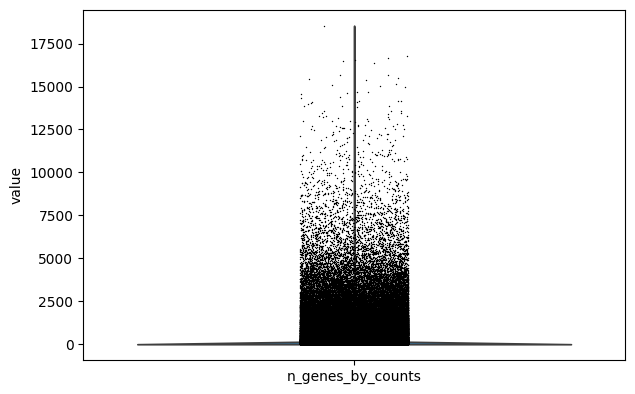

In [54]:
sc.pl.violin(adata_qc, keys='n_genes_by_counts', show=False)

In [55]:
sc.pp.filter_cells(adata_qc, min_genes=200)
sc.pp.filter_genes(adata_qc, min_cells=1)

In [56]:
adata_qc

AnnData object with n_obs × n_vars = 67376 × 93515
    obs: 'sample', 'tissue', 'condition', 'batch', 'patient', 'severity', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

/nfs/home/students/d.bassow/.conda/envs/gobi_lupus/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


<Axes: ylabel='value'>

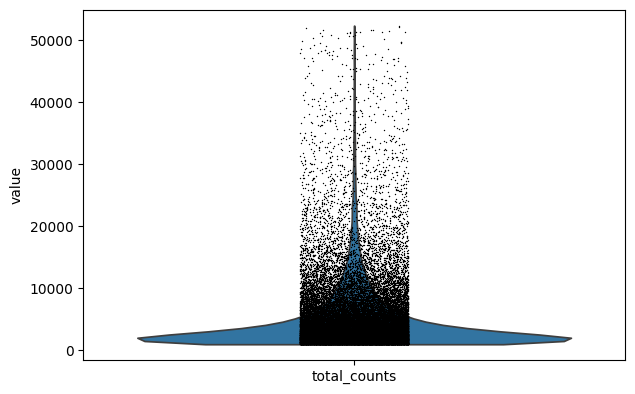

In [66]:
sc.pl.violin(adata_qc, keys='total_counts', show=False)

In [65]:
sc.pp.filter_cells(adata_qc, min_counts=1000)

In [67]:
adata_qc

AnnData object with n_obs × n_vars = 38664 × 93515
    obs: 'sample', 'tissue', 'condition', 'batch', 'patient', 'severity', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'outlier', 'mt_outlier'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

/nfs/home/students/d.bassow/.conda/envs/gobi_lupus/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


<Axes: ylabel='value'>

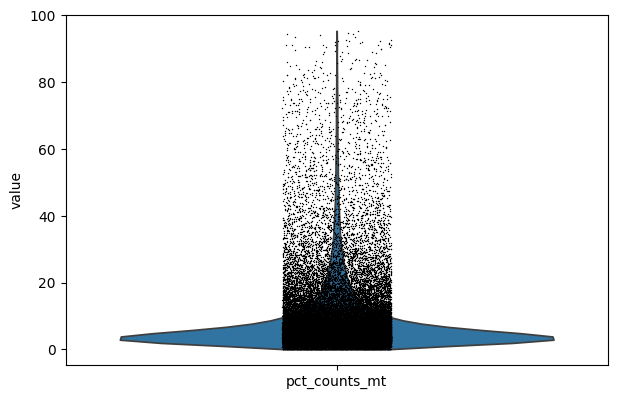

In [61]:
sc.pl.violin(adata_qc, keys='pct_counts_mt', show=False)

In [62]:
adata_qc = tb.perform_qc_filtering(adata_qc, limit_pct_counts_mt=15)

Number of outliers: 151
Number of mt outliers: 6591


In [10]:
adata

AnnData object with n_obs × n_vars = 2499859 × 176760
    obs: 'sample', 'tissue', 'condition', 'batch', 'patient', 'severity'

In [63]:
adata_qc

AnnData object with n_obs × n_vars = 42784 × 93515
    obs: 'sample', 'tissue', 'condition', 'batch', 'patient', 'severity', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'outlier', 'mt_outlier'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

/nfs/home/students/d.bassow/.conda/envs/gobi_lupus/lib/python3.12/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


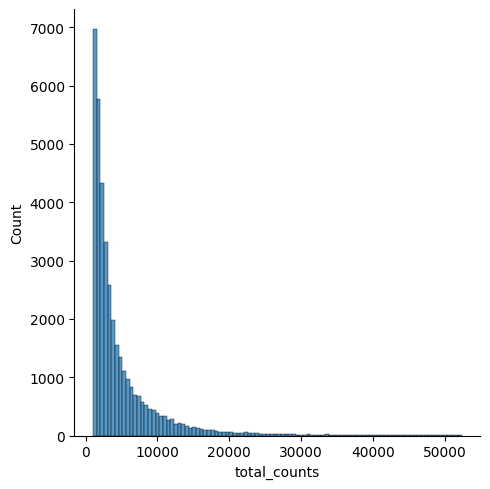

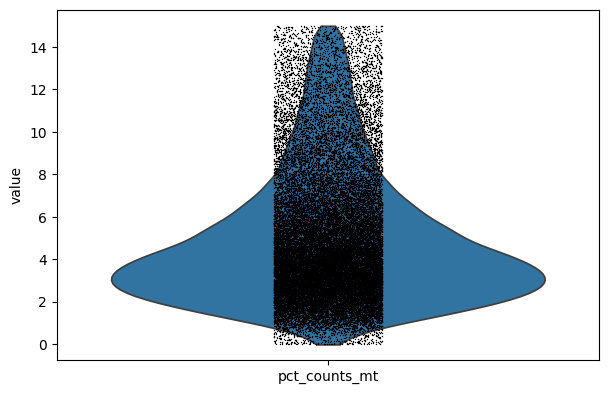

/nfs/home/students/d.bassow/.conda/envs/gobi_lupus/lib/python3.12/site-packages/scanpy/plotting/_utils.py:716: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


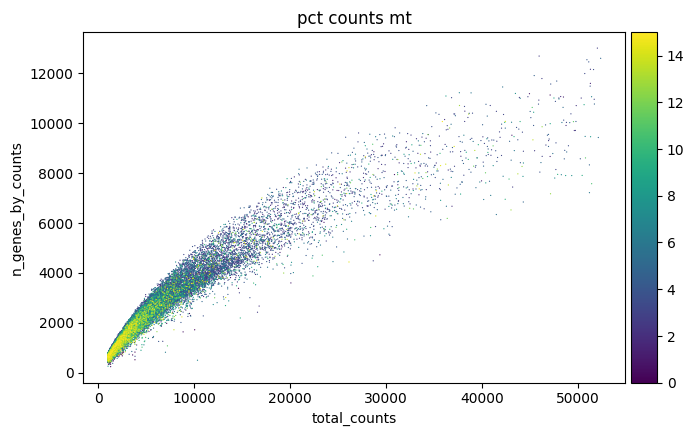

In [68]:
tb.plot_qc_metrics(adata_qc)

In [ ]:
adata_qc.write('/nfs/data/COST_IBD/data/atopic_dermatitis/anndata/filtered/he.head')

In [5]:
adata = sc.read('/nfs/data/COST_IBD/data/atopic_dermatitis/anndata/he.h5ad')

In [7]:
adata.var

,mt,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,n_cells
ABHD17AP1,False,False,False,26,1.040059e-05,1.040053e-05,99.99896,26.0,3.295837,16
ADH5P2,False,False,False,3,2.000113e-06,2.000111e-06,99.99988,5.0,1.791759,3
ADORA2BP1,False,False,False,14,6.000339e-06,6.000320e-06,99.99944,15.0,2.772589,11
AKR1B1P1,False,False,False,2,8.000451e-07,8.000448e-07,99.99992,2.0,1.098612,2
AKR1D1P1,False,False,False,41,1.640093e-05,1.640079e-05,99.99836,41.0,3.737670,35
...,...,...,...,...,...,...,...,...,...,...
SERBP1P2-A,False,False,False,1,4.000226e-07,4.000225e-07,99.99996,1.0,0.693147,1
TEKT4P1-A,False,False,False,2,8.000451e-07,8.000448e-07,99.99992,2.0,1.098612,1
LOC105377223-A,False,False,False,124,5.160291e-05,5.160158e-05,99.99504,129.0,4.867535,118
LOC105379273-A,False,False,False,10,4.000226e-06,4.000217e-06,99.99960,10.0,2.397895,8


In [8]:
adata.var_names = adata.var_names.str.replace('MT-CYTB', 'MT-CYB')
adata.var_names = adata.var_names.str.replace('MT-COX1', 'MT-CO1')
adata.var_names = adata.var_names.str.replace('MT-COX2', 'MT-CO2')
adata.var_names = adata.var_names.str.replace('MT-COX3', 'MT-CO3')

In [ ]:
adata.write('/nfs/data/COST_IBD/data/atopic_dermatitis/anndata/he.h5ad')

In [4]:
adata = sc.read_h5ad("/nfs/data/COST_IBD/data/atopic_dermatitis/anndata/filtered/he.head")

In [6]:
adata

AnnData object with n_obs × n_vars = 38664 × 93515
    obs: 'sample', 'tissue', 'condition', 'batch', 'patient', 'severity', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'n_counts', 'outlier', 'mt_outlier'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'